## Interferencia cuántica

### Bibliotecas

In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
import matplotlib
import scipy.constants


from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Versiones

print("Numpy",np.version.version)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)

Numpy 1.18.1
Pandas 0.22.0
Matplotlib 3.3.0


---

### Parámetros y constantes

In [3]:

# Constantes


# Pi
π=math.pi

# i complejo
i=complex(0,1)

# Permitividad eléctrica del vacío
ϵ0=scipy.constants.epsilon_0

# Constante de Plank 
ħ=scipy.constants.h



# Parámetros


# Número de fotones
puntos=2

# Distancia entre rendijas
a=2.5e-4 #podria ser del orden de  lamda/2

# Longitud de onda del haz
λ=810e-9

# Radio de coherencia del fotón
rc=0.005

# Área de coherencia del fotón
A=(4*π*pow(rc,2))

# Anchura de la modulación gaussiana
Δμ=0.000005

# Frecuencia angular
ω=2*π/λ

# Energía del fotón
E=ħ*ω


In [4]:
pz=0.57

# Resolución de la pantalla (lx X ly) en pixeles

lx=100
ly=100

# Por lo tanto, la pantalla tiene (lx)*(ly) pixeles

### Código

In [5]:
# Lista de las coordenadas en x.
pxs=[]

# Lista de las coordenadas en y.
pys=[]

# Lista de las amplitudes de probabilidad para cada punto.
probabilidad=[]


for l in range(-lx,lx):
    # Coordenada x (o bien, el valor i que corre en los renglones de la matriz Mij que forma la pantalla).
    px=l/10000  
    
    for k in range(-ly,ly):
            
        # Coordenada y (o bien, el valor j que corre en los renglones de la matriz Mij que forma la pantalla).
        py=k/10000
        
        # Este término nos ayuda a calcular la superposición de los campos.
        Ap=complex(0,0) 

        for j in range(1,3):
            
            # El valor de la posición x determina la rendija de donde sale el fotón.
            # Las rendijas se encuentran en x = a/2 y x= - a/2.
            # El índice j toma valores j=1,2 de modo que x=(-1)^j (a/2) permite 
            # la salida del fotón por una rendija a la vez.
            r=complex(a/2,0)
            
            x=pow(-1,j)*r.real
            y=0
            z=0
            
            
            # Distancia de la ranura a cada punto de la pantalla.
            R=math.sqrt(pow((px-x),2)+pow((py-y),2)+pow((pz-z),2))          
         
            # Volumen de coherencia del fotón.                 
            v=A*R        
            
            # Factor f(r)
            f=i*pow(E/(2*ϵ0*v),0.5)/R 
            
            # Cálculo de la fase.
            aphase=(1/math.sqrt(puntos))*f*cmath.exp((i*π*2)*R/λ)
            
            # Superposición de las fases.
            Ap=Ap+(aphase)

        # Modulación gaussiana.    
        rmod=math.exp(-pow(px,2)/(2*Δμ))/31289.1562
        
        # Añadimos los valores calculados a las listas.
        probabilidad.append(((Ap*Ap.conjugate()).real)*rmod)
        pxs.append(px)
        pys.append(py)        

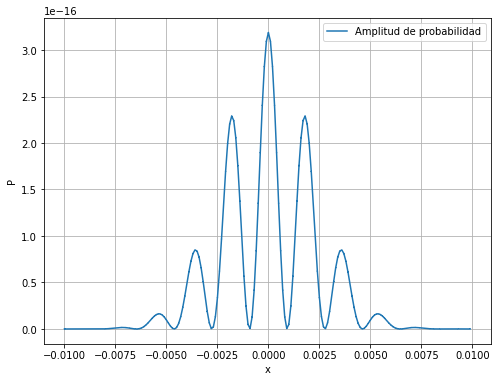

In [6]:
plt.plot(pxs,probabilidad,label="Amplitud de probabilidad",linestyle="-")


plt.xlabel("x")
plt.ylabel("P")

plt.legend(loc=0)
plt.grid()

plt.gcf().set_size_inches(8, 6)

plt.savefig("pro")
plt.show()

### Datos

In [7]:
# Coordenadas  x,y y valores de la probabilidad

data0 = {"x":pxs,"y":pys,"p":probabilidad}


datos= pd.DataFrame(data0)
datos.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 6/datos/datos.csv")
datos;

In [7]:
# Promedio

promedio=np.mean(probabilidad)
promedio

4.4675572365565494e-17

In [8]:
# Desviación estandar

ds=np.std(probabilidad)
ds

7.455361185493171e-17

In [9]:
# varianza

varianza=np.var(probabilidad)
varianza

5.558241040615814e-33

---

### Variación de la longitud de onda

In [8]:
def inter(λ):

    puntos=2
    a=2.5e-4 
    S=0.005
    Δμ=0.000005
    ħ=scipy.constants.h
    ϵ0=scipy.constants.epsilon_0
    ω=2*math.pi/λ
    E=ħ*ω
    i=complex(0,1)
    π=math.pi
    Di=(π*pow(S,2))

    pz=0.57
    lx=100
    ly=100
    nx=0

    pxs=[]
    pys=[]
    probabilidad=[]

    for l in range(-lx,lx):

        nx=nx+1
        px=l/10000  

        for k in range(-ly,ly):

            py=k/10000
            Ap=complex(0,0) 

            for j in range(1,3):

                r=complex(a/2,0)
                x=pow(-1,j)*r.real
                y=0
                z=0
                R=math.sqrt(pow((px-x),2)+pow((py-y),2)+pow((pz-z),2))               
                v=Di*R
                ter=pow(E/(2*ϵ0*v),0.5)           
                f=i*ter
                aphase=(1/math.sqrt(puntos))*f*cmath.exp((i*π*2)*R/λ)
                Ap=Ap+(aphase/R)

            rmod=math.exp(-pow(px,2)/(2*Δμ))/31289.1562            
            pys.append(py)
            pxs.append(px)
            probabilidad.append(((Ap*Ap.conjugate()).real)*rmod)
 
    return probabilidad

In [9]:
probabilidad_r=inter(810e-9)
probabilidad_g=inter(497e-9)
probabilidad_b=inter(427e-9)

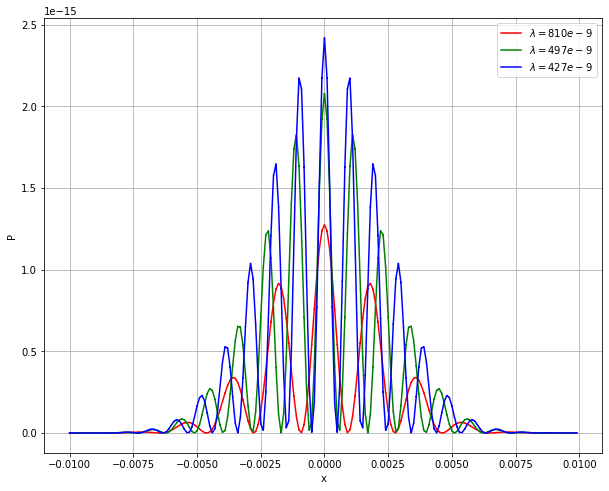

In [10]:
plt.plot(pxs,probabilidad_r,color="red",label="$λ=810e-9$",linestyle="-")
plt.plot(pxs,probabilidad_g,color="green",label="$λ=497e-9$",linestyle="-")
plt.plot(pxs,probabilidad_b,color="blue",label="$λ=427e-9$",linestyle="-")

plt.xlabel("x")
plt.ylabel("P")

plt.legend(loc=0)
plt.grid()

plt.gcf().set_size_inches(10, 8)

plt.savefig("lambda")
plt.show()

---

### Amplitud de probabilidad

In [11]:
#Se copian las listas probabilidad,pxs y pys, para no afectar los datos originales. 

pb=probabilidad.copy()
cx=pxs.copy()
cy=pys.copy()

#Se remueven aleatoriamente valores de las listas pb,cx y cy, para disminuir el tiempo de ploteo
#y el requerimiento de memoria. 
#Al final cada lista tiene 5000 elementos.

for i in range(20000):
    pb.pop(random.randrange(len(pb))) 
    cx.pop(random.randrange(len(cx))) 
    cy.pop(random.randrange(len(cy))) 
for i in range(10000):
    pb.pop(random.randrange(len(pb))) 
    cx.pop(random.randrange(len(cx))) 
    cy.pop(random.randrange(len(cy))) 
for i in range(5000):
    pb.pop(random.randrange(len(pb))) 
    cx.pop(random.randrange(len(cx))) 
    cy.pop(random.randrange(len(cy))) 

<IPython.core.display.Javascript object>


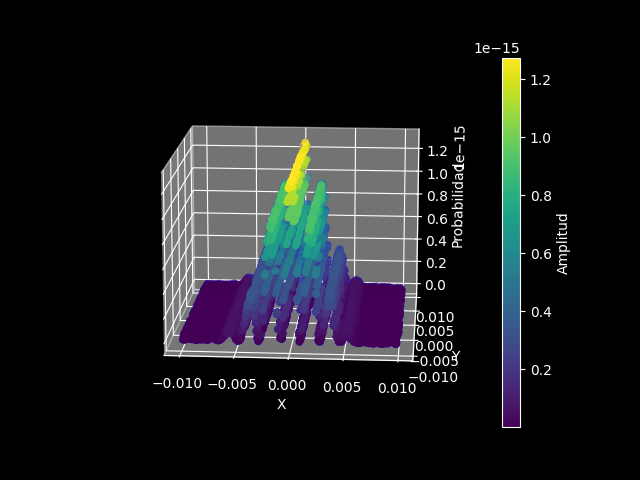

In [14]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph
#http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/

%matplotlib notebook
plt.style.use('dark_background') 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X =cx
Y =cy
Z =pb

ax.scatter(X, Y, Z, c='b', marker='o')

pnt3d=ax.scatter(X,Y,Z,c=Z)
cbar=plt.colorbar(pnt3d)


cbar.set_label("Amplitud")


ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Probabilidad')

plt.show()
plt.savefig('interferencia_3d.png', dpi=100)

---

### Patrón de interferencia

<IPython.core.display.Javascript object>


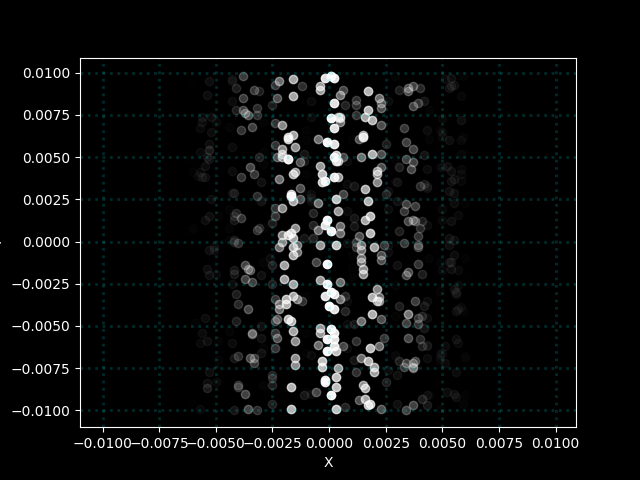

In [13]:
%matplotlib notebook

#La intencidad de los puntos depende de amplitud de probabilidad


plt.style.use('dark_background')   
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

#Número de fotones

NF=1000

for j in range(NF):


    ra=random.randint(0,len(probabilidad))
    
    #Normalización de la intencidad
    intensidad=1*probabilidad[ra]/max(probabilidad)

    
    plt.scatter(pxs[ra],pys[ra],c="white",alpha=intensidad)    
    plt.gcf().canvas.draw()
    

plt.gcf().canvas.flush_events()
plt.pause(0.000000000000001)        

plt.xlabel('X')
plt.ylabel('Y')
#plt.title('Patrón de interferencia')

plt.show()
plt.savefig("patron_interferencia.png", dpi=100)
